# Introduction

This is a Jupyter Notebook for the Machine Learning assessment. The data is about Credit Card Default, from UCI Machine Learning Repository, link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. 

## Objectives

The objective of this model is to correctly predict which Credit Card Customers will default on their Credit Card Bill. The dataset originates from a Taiwanese Financial Institution who provides credit card to their customers. From the dataset, we have certain demographic information about the customers, credit card bills, how much credit card bill they paid and whether they have defaulted on their credit card bill. <br><br>
For your reference, the academic paper that comes with the dataset is provided with the zip file.

### Column Names and Column Descriptions

Below provides more information on the columns and what they signify:

| Column Name | Description | 
|---| --- |
| ID | Automatically generated ID |
LIMIT_BAL                 |Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit                                                     |
SEX	                      |Values: 1 = male; 2 = female                                                     |
EDUCATION                 |Values: 1 = graduate school; 2 = university; 3 = high school; 4 = others                                                     |
MARRIAGE                  |Marital status. Values: 1 = married; 2 = single; 3 = others                                                     |
AGE	                      |Age in Years                                                     |
PAY_0 to PAY_6            |History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <br> X6 = the repayment status in September, 2005; <br> X7 = the repayment status in August, 2005; . . .; <br> X11 = the repayment status in April, 2005. <br><br> The measurement scale for the repayment status is: <br> -1 = pay duly; <br> 1 = payment delay for one month; <br> 2 = payment delay for two months;. . .; <br> 8 = payment delay for eight months; <br> 9 = payment delay for nine months and above. <br> PAY_n is sorted in descending order, in which PAY_0 is  September 2005 and PAY_6 April 2005. |
BILL_AMT1 to BILL_AMT6    |Amount of bill statement (NT dollar). <br> BILL_AMT1 =  amount of bill statement in September 2005; <br> BILL_AMT2 = amount of bill statement in August, 2005; . . .; <br> BILL_AMT6 = amount of bill statement in April, 2005.|
PAY_AMT1 to PAY_AMT6      |Amount of previous payment (NT dollar). <br> PAY_AMT1 = amount paid in September, 2005; <br> PAY_AMT2 = amount paid in August, 2005; . . .; <br> PAY_AMT6 = amount paid in April, 2005. |
default payment next month| Probability of Credit Card bill default the following month. <br> Values: 1 = Default, 0= Non-default |


Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Loading Data to Pandas DataFrame and Data Checking and Cleaning

### Dependencies

This notebook requires the following Python version and modules available. Below are the instructions to create using > Anaconda Prompt 

<b> Installation Steps for Python and relevant Libraries (Anaconda)</b>
1. Install Anaconda Distribution (link: https://www.anaconda.com/products/distribution)
2. After installation, open Anaconda Prompt
3. Assuming no environment created, create one using the following command: ``` conda create --name ML python=3.9.7 numpy pandas scikit-learn matplotlib notebook ```
4. Once environment created, use command ```conda activate ML```

Please install module 'xlrd' before running the code. XLRD is needed to enable Pandas to read Excel files (.xls file types). Please see installation steps using either <b>PIP</b> or <b>CONDA</b> below:

<b> Installation Steps (Pip)</b>
1. Open Windows Command Prompt
2. At Command Prompt, type ```pip install xlrd```
3. Proceed to run below

<b> Installation Steps (Anaconda Prompt)</b>
1. Open Anaconda Prompt
2. Change to environment by ```conda activate ML```
3. At Command Prompt, type ```conda install xlrd```

<b>After installing ```xlrd```, please perform following steps: </b>

1. At Anaconda Prompt, type: ```conda activate ML```
2. Type: ```jupyter notebook```
3. Open this Jupyter Notebook file (.ipynb) at Jupyter Notebook
4. Proceed to run below



In [1]:
# Import steps:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas: set to display 30 max columns
pd.set_option('display.max_columns', 30)

In [2]:
# Import the raw file to a Pandas DataFrame
folder = ['data']
filepath = os.sep.join(folder + ['default_of_credit_card_clients.xls'])

CreditCardDefault = pd.read_excel(filepath, sheet_name = 'Data', header=1)
CreditCardDefault.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Drop ID Column as it is irrelevant 
CreditCardDefault.drop('ID', inplace=True, axis=1)

# Find Number of Rows 
print('Number of Rows: {}'.format(CreditCardDefault.shape[0]))
# Check DataFrame Shape to check if data read correctly
print()
print('CreditCardDefault DataFrame Shape:{}'.format(CreditCardDefault.shape))
print()
# Check that columns have been converted to correct Data Type
# Counter check with Attribute Information from UCI Archive Page

print('List of Columns and Data Types')
print(CreditCardDefault.dtypes)

Number of Rows: 30000

CreditCardDefault DataFrame Shape:(30000, 24)

List of Columns and Data Types
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [4]:
# Ensure that DataFrame.describe() does not have any exponential notations
CreditCardDefault.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


In [5]:
# Rename Target Column and Transform data type from int64 to bool

CreditCardDefault.rename({'default payment next month' : 'DefaultOnCreditCardBill'}, axis='columns', inplace=True)
CreditCardDefault['DefaultOnCreditCardBill'] = CreditCardDefault['DefaultOnCreditCardBill'].astype('bool')

CreditCardDefault.dtypes

LIMIT_BAL                  int64
SEX                        int64
EDUCATION                  int64
MARRIAGE                   int64
AGE                        int64
PAY_0                      int64
PAY_2                      int64
PAY_3                      int64
PAY_4                      int64
PAY_5                      int64
PAY_6                      int64
BILL_AMT1                  int64
BILL_AMT2                  int64
BILL_AMT3                  int64
BILL_AMT4                  int64
BILL_AMT5                  int64
BILL_AMT6                  int64
PAY_AMT1                   int64
PAY_AMT2                   int64
PAY_AMT3                   int64
PAY_AMT4                   int64
PAY_AMT5                   int64
PAY_AMT6                   int64
DefaultOnCreditCardBill     bool
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


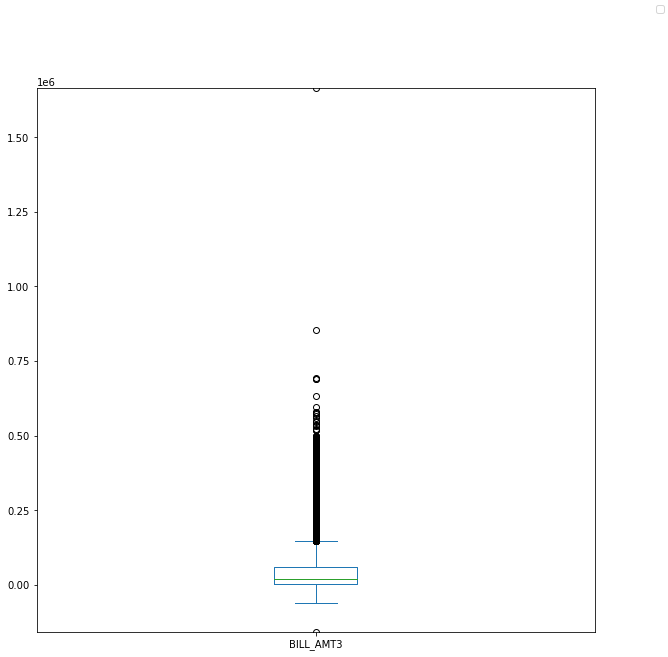

In [80]:
# Check the values of Bill_Amt_3 column

%matplotlib inline

Bill_Amt3_Chk = CreditCardDefault['BILL_AMT3']
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

Bill_Amt3_Chk.plot.box(ax=ax)
fig.legend()
plt.ylim(CreditCardDefault['BILL_AMT3'].min(), CreditCardDefault['BILL_AMT3'].max() )
plt.show()

In [7]:
# Check for any missing values
np.where(pd.isna(CreditCardDefault))
print()

# Check if there are any nulls at columns
# False means no nulls at the columns 
CreditCardDefault.isnull().any()

LIMIT_BAL                  False
SEX                        False
EDUCATION                  False
MARRIAGE                   False
AGE                        False
PAY_0                      False
PAY_2                      False
PAY_3                      False
PAY_4                      False
PAY_5                      False
PAY_6                      False
BILL_AMT1                  False
BILL_AMT2                  False
BILL_AMT3                  False
BILL_AMT4                  False
BILL_AMT5                  False
BILL_AMT6                  False
PAY_AMT1                   False
PAY_AMT2                   False
PAY_AMT3                   False
PAY_AMT4                   False
PAY_AMT5                   False
PAY_AMT6                   False
DefaultOnCreditCardBill    False
dtype: bool

<b>Conclusion: </b> There are no missing values nor null values 

In [8]:
# Get Relative Frequency Counts of Categorical Variables
CatVal = ['SEX','EDUCATION', 'MARRIAGE']

for Var in CatVal:
    print(CreditCardDefault[Var].value_counts(normalize=True))
    print()

2    0.603733
1    0.396267
Name: SEX, dtype: float64

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64



In [9]:
CreditCardDefault['AGE']

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64

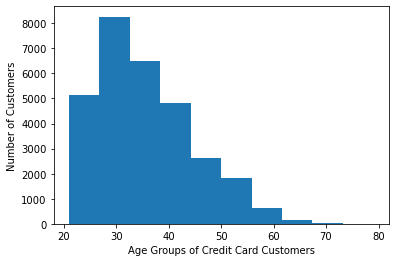

In [10]:
# Bin Age into Age Groups and plot in a histogram

# Age = CreditCardDefault['Age']
plt.hist(CreditCardDefault['AGE'], bins=10, align='mid')
plt.xlabel('Age Groups of Credit Card Customers')
plt.ylabel('Number of Customers')
plt.show()

In [11]:
print(CreditCardDefault['DefaultOnCreditCardBill'].value_counts(normalize=True))

print(CreditCardDefault['DefaultOnCreditCardBill'].value_counts())

False    0.7788
True     0.2212
Name: DefaultOnCreditCardBill, dtype: float64
False    23364
True      6636
Name: DefaultOnCreditCardBill, dtype: int64


In [16]:
# Drop Categorical Columns
# I will be looking at Current Credit Card bill (BILL_AMT(n) ), and Credit Card Bill Payment (PAY_AMT(n)) 

CreditCardDefault.drop(['SEX', 'EDUCATION',  'MARRIAGE', 'AGE'], axis=1, inplace=True)

In [17]:
CreditCardDefault.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultOnCreditCardBill
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,True
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,True
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,False


# Model Preparation and Building

For Model Preparation, I will be performing a Stratified Shuffle Split to keep the Classifier proportion across Train and Test Dataset

For this first iteration, I will be building a simple Logistic Regression.

I have chosen the following Models for Training:
1. Logistic Regression
2. Logistic Regression with Cross Validation
3. Decision Tree Classifier
4. Gaussian Naive Bayes
5. Random Forest Classifier
6. Support Vector Machine

At this stage, the default settings have been kept as much as possible for this stage. If any changes, only the max number of iterations are changed.
After training, I will look at <b>Accuracy metric</b> to see the best model to use for hyperparameter tuning 

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get Feature Columns

Feature_Cols = [x for x in CreditCardDefault if x != 'DefaultOnCreditCardBill']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(CreditCardDefault[Feature_Cols], CreditCardDefault['DefaultOnCreditCardBill']))

X_train = CreditCardDefault.loc[train_idx, Feature_Cols]
y_train = CreditCardDefault.loc[train_idx, 'DefaultOnCreditCardBill']

X_test  = CreditCardDefault.loc[test_idx, Feature_Cols]
y_test  = CreditCardDefault.loc[test_idx, 'DefaultOnCreditCardBill']

In [19]:
X_test['LIMIT_BAL'].isnull().value_counts()

False    9000
Name: LIMIT_BAL, dtype: int64

In [20]:
np.unique(y_test, return_counts=True)

(array([False,  True]), array([7009, 1991], dtype=int64))

After Train Test Split before model training, I will normalize values for Bill_Amt(n) and Pay_Amt(n) as it is in Taiwan NT Dollars currency. <br>
The scaling is done after the train/test split so that the scaling will be done within the split(s).
This is to prevent data leakage <br>(Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale)

In [21]:
from sklearn.preprocessing import scale

currency_cols = ['LIMIT_BAL' ,'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

X_train[currency_cols] = scale(X_train[currency_cols])

X_test[currency_cols] = scale(X_test[currency_cols])

# Check if scale applied correctly at Train Data
X_train.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-1.77,-1.56,-1.54,-1.53,-1.54,-1.49,-2.94,-1.67,-1.58,-1.93,-1.99,-4.16,-0.34,-0.29,-0.29,-0.32,-0.32,-0.30
25%,-0.91,-0.88,-0.72,-0.70,-0.67,-0.65,-0.62,-0.65,-0.65,-0.64,-0.64,-0.63,-0.63,-0.28,-0.24,-0.27,-0.30,-0.30,-0.29
50%,-0.21,0.01,0.11,0.14,0.19,0.24,0.25,-0.39,-0.40,-0.39,-0.38,-0.36,-0.37,-0.22,-0.19,-0.19,-0.22,-0.22,-0.21
75%,0.56,0.01,0.11,0.14,0.19,0.24,0.25,0.22,0.21,0.19,0.18,0.16,0.17,-0.04,-0.04,-0.04,-0.05,-0.05,-0.07
max,6.42,7.13,6.78,6.84,7.08,7.36,7.24,12.40,13.14,11.76,13.17,14.54,15.50,52.84,58.43,49.44,39.86,27.83,29.57


In [22]:
# Check if scale applied correctly at Test Data
X_test.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-1.76,-1.57,-1.52,-1.50,-1.51,-1.47,-0.89,-0.95,-2.89,-3.32,-1.55,-6.36,-0.34,-0.21,-0.31,-0.29,-0.31,-0.29
25%,-0.91,-0.87,-0.73,-0.69,-0.66,-0.64,-0.61,-0.65,-0.65,-0.63,-0.64,-0.64,-0.63,-0.28,-0.19,-0.29,-0.27,-0.29,-0.28
50%,-0.21,0.02,0.11,0.14,0.19,0.22,0.25,-0.39,-0.39,-0.38,-0.37,-0.37,-0.37,-0.21,-0.14,-0.20,-0.20,-0.21,-0.20
75%,0.56,0.02,0.11,0.14,0.19,0.22,0.25,0.22,0.20,0.19,0.17,0.16,0.18,-0.04,-0.03,-0.05,-0.04,-0.05,-0.06
max,4.88,7.13,5.99,6.79,6.93,6.29,7.15,9.44,8.74,22.85,10.35,8.48,8.89,28.89,60.50,24.83,32.48,24.64,28.97


In [23]:
# Check if stratified shuffle split has maintained Binary Class Proportion 
y_train.value_counts(normalize=True)

False    0.77881
True     0.22119
Name: DefaultOnCreditCardBill, dtype: float64

In [24]:
# Check if stratified shuffle split has maintained Binary Class Proportion 
y_test.value_counts(normalize=True)

False    0.778778
True     0.221222
Name: DefaultOnCreditCardBill, dtype: float64

In [25]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression using Default values except max_iter
# Max_Iter=100 failed to converge after 100th iteration
lr = LogisticRegression(max_iter=200, verbose=1, class_weight='balanced').fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [26]:
from sklearn.linear_model import LogisticRegressionCV

# Standard logistic regression using Default values except max_iter
# Max_Iter=100 failed to converge after 100th iteration
lr_CV = LogisticRegressionCV(max_iter=300, verbose=1, class_weight='balanced').fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


In [27]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42,verbose=1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished


In [28]:
print(RFC.n_outputs_)

1


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
# dt = dt.

In [30]:
print(y_train.value_counts())

False    16355
True      4645
Name: DefaultOnCreditCardBill, dtype: int64


In [31]:
# Print the number of nodes and maximum depth for Decision Tree Classifier

print('Total Node Count: {}'.format(dt.tree_.node_count))
print('Maximum Depth: {}'.format(dt.tree_.max_depth))

Total Node Count: 6465
Maximum Depth: 44


In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

In [33]:
from sklearn import svm

svm = svm.SVC(random_state=42).fit(X_train, y_train)

In [34]:
# Calculate the predicted outcomes based on the model
y_pred = list()

coeff_labels = ['lr', 'lr_CV', 'dt', 'rfc', 'gnb', 'svm']
coeff_models = [lr, lr_CV, dt, RFC, gnb, svm]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_pred.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


,lr,lr_CV,dt,rfc,gnb,svm
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,True,False,False,False
3,True,True,False,False,True,True
4,True,True,False,False,False,False


In [35]:
y_train.value_counts()

False    16355
True      4645
Name: DefaultOnCreditCardBill, dtype: int64

In [31]:
# testing only. delete later

for lab in coeff_labels:
    print('Prediction using {}'.format(lab))
    print(y_pred[lab].value_counts())

Prediction using lr
True     4840
False    4160
Name: lr, dtype: int64
Prediction using lr_CV
True     4838
False    4162
Name: lr_CV, dtype: int64
Prediction using dt
False    6876
True     2124
Name: dt, dtype: int64
Prediction using rfc
False    7862
True     1138
Name: rfc, dtype: int64
Prediction using gnb
True     6416
False    2584
Name: gnb, dtype: int64
Prediction using svm
False    9000
Name: svm, dtype: int64


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:
    # Calculate Precision, recall, f-score for binary classification
    # Support metrics will not be used 
    precision, recall, fscore, _ = score(y_test, y_pred[lab])

    # Calculate Accuracy 
    accuracy = accuracy_score(y_test, y_pred[lab])

    # Calculate the ROC-AUC scores
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
                        label_binarize(y_pred[lab], classes=[0,1])
                        )

    # Calculate Confusion Matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precision, 'recall': recall,
                              'fscore': fscore, 'accuracy': accuracy,
                              'auc':auc
                             },
                            name=lab)
                  )

metrics = pd.concat(metrics, axis=1)

In [33]:
metrics

,lr,lr_CV,dt,rfc,gnb,svm
precision,"[0.8605769230769231, 0.29152892561983473]","[0.8606439211917347, 0.291649441918148]","[0.8307155322862129, 0.3893596986817326]","[0.8380819129992368, 0.6309314586994728]","[0.8587461300309598, 0.253428927680798]","[0.7787777777777778, 0.0]"
recall,"[0.5107718647453274, 0.7086891009542943]","[0.5110572121557997, 0.7086891009542943]","[0.8149522043087459, 0.4153691612255148]","[0.9400770438008275, 0.3606228026117529]","[0.31659295191896136, 0.8166750376695128]","[1.0, 0.0]"
fscore,"[0.641060076998836, 0.41311667398623925]","[0.6413033748097753, 0.4132376629081857]","[0.8227583723442563, 0.40194410692588095]","[0.8861542599690672, 0.4589325663151167]","[0.462629000312728, 0.38682050672059]","[0.875632456743082, 0.0]"
accuracy,0.554556,0.554778,0.726556,0.811889,0.427222,0.778778
auc,0.60973,0.609873,0.615161,0.65035,0.566634,0.5


Looking at above Accuracy, the Random Forest Classifier has performed the best out of the 6 models used. 
Random Forest Classifier will then be used in later Hyperparameter Tuning

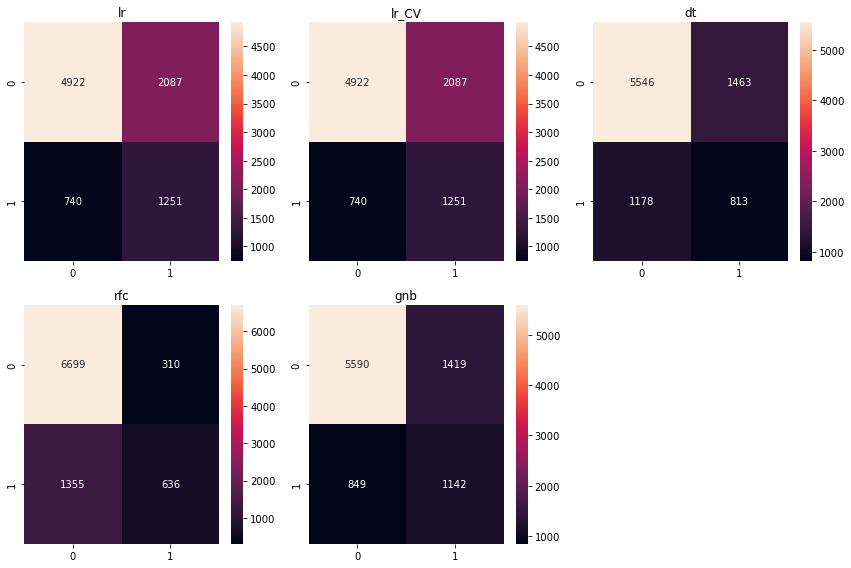

In [77]:
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12, 8)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [39]:
print(RFC.max_depth)

None


In [40]:
# List of Hyperparameters for the Random Forest Classifier

# Number of Estimators
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

# Criterion to be used
Criterion = ['gini', 'entropy']

# Max Depth
Max_depth = [2,3,4,5,6,7,8]

# Bootstrapping 
bootstrap = ['True', 'False']

# Min Samples Split
min_samples_split = [int(x) for x in np.linspace(start=2, stop=10, num=1)]

In [41]:
# Since Random Forest Classifier has the highest accuracy, use Grid Search to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': n_estimators, 
            'criterion': Criterion,
            'max_depth': Max_depth,
            'bootstrap': bootstrap,
            'min_samples_split': min_samples_split
            }
# n_jobs value uses all CPU cores
GSearch = GridSearchCV(RFC, parameters, verbose=4, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 391 out of 391 | elapsed:   14.8s finished


In [42]:
# Get best Hyperparameters to use for next model training
GSearch.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 391}

In [43]:
# Train the model using the best parameters

RFC_BestParam = RandomForestClassifier(n_estimators=391, criterion='gini', max_depth=7, bootstrap=True, min_samples_split = 2).fit(X_train, y_train)

In [44]:
# Compare the Accuracy metrics from old vs new Random Forest Classifier Model

# Calculate the predicted outcomes based on the model
y_pred_RFC = list()

coeff_labels_RFC = ['RFC','RFC_BestParam']
coeff_models_RFC = [RFC,RFC_BestParam]

for lab,mod in zip(coeff_labels_RFC, coeff_models_RFC):
    y_pred_RFC.append(pd.Series(mod.predict(X_test), name=lab))

# Combine Result from earlier RFC Model with default hyperparameters
y_pred_RFC = pd.concat(y_pred_RFC, axis=1)

y_pred_RFC.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


,RFC,RFC_BestParam
0,False,False
1,False,False
2,False,False
3,False,True
4,False,False


In [47]:
metrics_RFC = list()
cm_rfc = dict()

for lab in coeff_labels_RFC:
    # Calculate Precision, recall, f-score for binary classification
    # Support metrics will not be used 
    precision_rfc, recall_rfc, fscore_rfc, _ = score(y_test, y_pred_RFC[lab])

    # Calculate Accuracy 
    accuracy_rfc = accuracy_score(y_test, y_pred_RFC[lab])

    # Calculate the ROC-AUC scores
    auc_rfc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
                        label_binarize(y_pred_RFC[lab], classes=[0,1])
                        )

    # Calculate Confusion Matrix
    cm_rfc[lab] = confusion_matrix(y_test, y_pred_RFC[lab])

    metrics_RFC.append(pd.Series({'precision': precision_rfc, 'recall': recall_rfc,
                              'fscore': fscore_rfc, 'accuracy': accuracy_rfc,
                              'auc':auc_rfc
                             },
                            name=lab)
                  )

metrics_RFC = pd.concat(metrics_RFC, axis=1)

In [48]:
metrics_RFC

,RFC,RFC_BestParam
precision,"[0.8317606158430594, 0.6723044397463002]","[0.8357554497619645, 0.6679764243614931]"
recall,"[0.9557711513768012, 0.31943746860873934]","[0.9517762876301897, 0.3415369161225515]"
fscore,"[0.8894642501493727, 0.43309499489274766]","[0.8900006670669068, 0.4519774011299435]"
accuracy,0.815,0.816778
auc,0.637604,0.646657


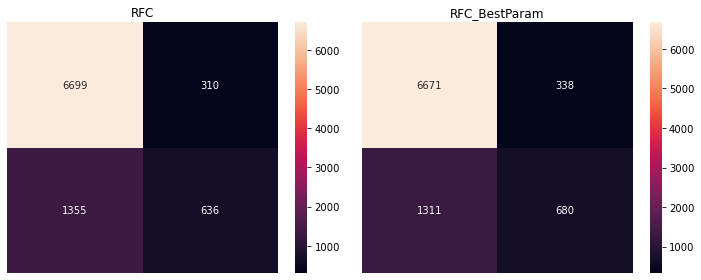

In [74]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 4)

axList[-2].axis('off')
axList[-1].axis('off')

for ax,lab in zip(axList[0:2], coeff_labels_RFC):
    sns.heatmap(cm_rfc[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [50]:
accuracy_rfc

0.8167777777777778

# Observation and Conclusion

1. Even after changing the hyperparameter tuning using GridSearchCV, the accuracy doesn't increase beyond 81%
2. Looking at the Confusion Matrix, there are less False Positive cases for the Random Forest Classifier that went through hyperparameter tuning.

### Concluding Notes:

1. Looking at this results and back to the academic paper written together with the Credit Card Default Data, this is the highest accuracy we can achieve without using a Neural Network Architecture
2. This is also in line with their results, that a neural network architecture can achieve the highest accuracy (or R squared value of 0.99).
3. Also, there is a danger of Random Forest Classifier being a "black box" (meaning we may not know what is happening underneath), so explainability may be lesser, as compared to using a Logistic Regression

